<a href="https://colab.research.google.com/github/pavankumarallu/K_ML/blob/main/income_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-census-income/adult.csv


In [ ]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts

import tensorflow as tf


In [ ]:
df = pd.read_csv('../input/adult-census-income/adult.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Preprocessing

In [ ]:
df = df.drop('education.num',axis =1)

### Missing values

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
df['workclass'].unique(),df['occupation'].unique(),df['native.country'].unique()

(array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
        'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
       dtype=object),
 array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
        'Other-service', 'Adm-clerical', 'Craft-repair',
        'Transport-moving', 'Handlers-cleaners', 'Sales',
        'Farming-fishing', 'Tech-support', 'Protective-serv',
        'Armed-Forces', 'Priv-house-serv'], dtype=object),
 array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
        'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
        'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
        'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
        'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
        'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
        'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
        'Portugal', 'Laos', 'Thai

In [ ]:
df = df.replace('?',np.NaN)

In [ ]:
df.loc[:,['education','education.num']]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['education.num'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
categorical_features = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country']


In [ ]:
def get_categorical_uniques(df,columns):
    categorical_uniques = dict()
    for column in columns:
        categorical_uniques[column] = list(df[column].unique())
    return categorical_uniques

In [ ]:
get_categorical_uniques(df,categorical_features)

{'workclass': [nan,
  'Private',
  'State-gov',
  'Federal-gov',
  'Self-emp-not-inc',
  'Self-emp-inc',
  'Local-gov',
  'Without-pay',
  'Never-worked'],
 'education': ['HS-grad',
  'Some-college',
  '7th-8th',
  '10th',
  'Doctorate',
  'Prof-school',
  'Bachelors',
  'Masters',
  '11th',
  'Assoc-acdm',
  'Assoc-voc',
  '1st-4th',
  '5th-6th',
  '12th',
  '9th',
  'Preschool'],
 'marital.status': ['Widowed',
  'Divorced',
  'Separated',
  'Never-married',
  'Married-civ-spouse',
  'Married-spouse-absent',
  'Married-AF-spouse'],
 'occupation': [nan,
  'Exec-managerial',
  'Machine-op-inspct',
  'Prof-specialty',
  'Other-service',
  'Adm-clerical',
  'Craft-repair',
  'Transport-moving',
  'Handlers-cleaners',
  'Sales',
  'Farming-fishing',
  'Tech-support',
  'Protective-serv',
  'Armed-Forces',
  'Priv-house-serv'],
 'relationship': ['Not-in-family',
  'Unmarried',
  'Own-child',
  'Other-relative',
  'Husband',
  'Wife'],
 'race': ['White',
  'Black',
  'Asian-Pac-Islander',
  

In [ ]:
binary_features = ['sex']
nominal_features = ['workclass','education','marital.status','occupation','relationship','race','native.country']   

In [ ]:
def binary_encode(df,columns):
    label_encode = LabelEncoder()
    for column in columns:
        df[column] = label_encode.fit_transform(df[column])
    return df

def onehot_encode(df,columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df,dummies],axis = 1)
        df = df.drop(column,axis = 1)
    return df
        

In [ ]:
df = binary_encode(df,binary_features)
df = onehot_encode(df,nominal_features)

In [ ]:
(df.dtypes == 'object').sum()

1

In [ ]:
y = df['income']
x = df.drop('income',axis = 1)

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_mapping = {index: label for index,label in enumerate(label_encoder.classes_)}

In [ ]:
y_mapping


{0: '<=50K', 1: '>50K'}

In [ ]:
y

array([0, 0, 0, ..., 1, 0, 0])

### Scaling

In [ ]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [ ]:
x

,age,fnlwgt,sex,capital.gain,capital.loss,hours.per.week,Federal-gov,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,1.000000,0.043987,0.0,0.0,1.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.890411,0.081896,0.0,0.0,1.000000,0.173469,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.671233,0.118021,0.0,0.0,1.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.506849,0.086982,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.328767,0.171404,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.202298,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.136986,0.166404,0.0,0.0,0.000000,0.377551,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.315068,0.096500,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.561644,0.094827,0.0,0.0,0.000000,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Train

In [ ]:
x_train,x_test,y_train,y_test = tts(x,y,train_size=0.8,random_state=0)

In [ ]:
inputs = tf.keras.Input(shape=(103,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)


outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metrics = [
    tf.keras.metrics.BinaryAccuracy(name='acc'),
    tf.keras.metrics.AUC(name='auc')
]

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=metrics
)


batch_size = 32
epochs = 35


history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/35
652/652 [==============================] - 2s 2ms/step - loss: 0.4789 - acc: 0.7844 - auc: 0.7200 - val_loss: 0.3349 - val_acc: 0.8476 - val_auc: 0.8953
Epoch 2/35
652/652 [==============================] - 1s 1ms/step - loss: 0.3476 - acc: 0.8390 - auc: 0.8904 - val_loss: 0.3221 - val_acc: 0.8499 - val_auc: 0.9022
Epoch 3/35
652/652 [==============================] - 1s 2ms/step - loss: 0.3360 - acc: 0.8443 - auc: 0.8964 - val_loss: 0.3194 - val_acc: 0.8491 - val_auc: 0.9065
Epoch 4/35
652/652 [==============================] - 1s 2ms/step - loss: 0.3306 - acc: 0.8441 - auc: 0.9026 - val_loss: 0.3135 - val_acc: 0.8557 - val_auc: 0.9091
Epoch 5/35
652/652 [==============================] - 1s 2ms/step - loss: 0.3280 - acc: 0.8463 - auc: 0.9028 - val_loss: 0.3128 - val_acc: 0.8547 - val_auc: 0.9099
Epoch 6/35
652/652 [==============================] - 1s 1ms/step - loss: 0.3205 - acc: 0.8517 - auc: 0.9037 - val_loss: 0.3122 - val_acc: 0.8537 - val_auc: 0.9115
Epoch 7/35
652/6

# Performance

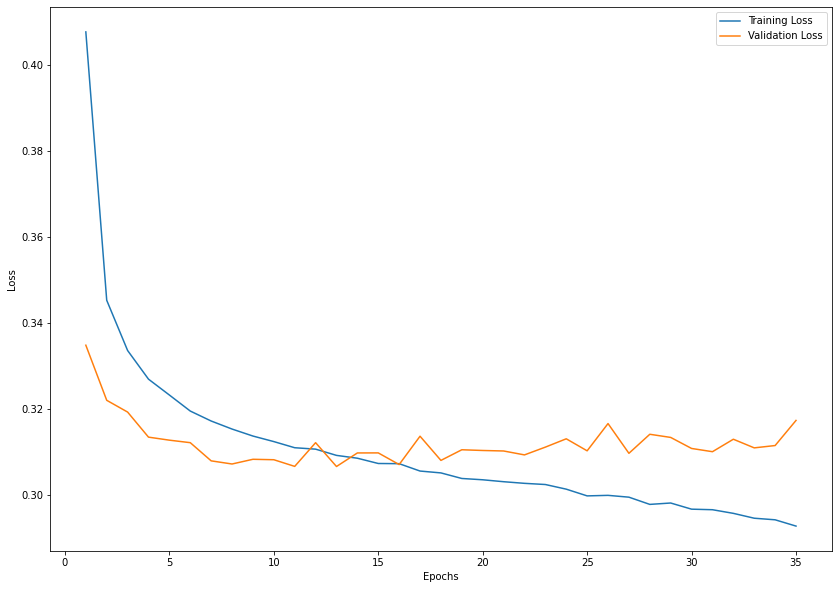

In [ ]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
np.argmin(val_loss)

12

In [ ]:
model.evaluate(x_test,y_test)

204/204 [==============================] - 0s 984us/step - loss: 0.3350 - acc: 0.8491 - auc: 0.9002


[0.33502188324928284, 0.8490710854530334, 0.9001550674438477]